In [1]:
### Network Slicing Recognition

The telecom industry is going through a massive digital transformation with the adoption of ML, AI, feedback-based automation and advanced analytics to handle the next generation applications and services. AI concepts are not new; the algorithms used by Machine Learning and Deep Learning are being currently implemented in various industries and technology verticals. With growing data and immense volume <br>

of information over 5G, the ability to predict data proactively, swiftly and with accuracy, is critically important. Data-driven decision making will be vital in future communication networks due to the traffic explosion and Artificial Intelligence (AI) will accelerate the 5G network performance. <br>

Mobile operators are looking for a programmable solution that will allow them to accommodate multiple independent tenants on the same physical infrastructure and 5G networks allow for end-to-end network resource allocation using the concept of Network Slicing (NS). <br>

Network Slicing will play a vital role in enabling a multitude of 5G applications, use cases, and services. Network slicing functions will provide an end-to-end isolation between slices with an ability to customize each slice based on the service demands (bandwidth, coverage, security, latency, reliability, etc). <br>

Your Task is to build a Machine Learning model that will be able to to proactively detect and eliminate threats based on incoming connections thereby selecting the most appropriate network slice, even in case of a network failure. <br>

In [2]:
###! pip install neattext

In [3]:
import pandas as pd
import numpy as np
import neattext.functions as nfx
import seaborn as sn

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel

In [4]:
###!mkdir ~/.kaggle

In [5]:
###!cp /kaggle.json ~/.kaggle/

In [6]:
###!chmod 600 ~/.kaggle/kaggle.json

In [7]:
###! pip install kaggle

In [8]:
###!pip install keras-tuner

In [9]:
###!kaggle datasets download -d gauravduttakiit/network-slicing-recognition

In [10]:
###!unzip /content/network-slicing-recognition.zip

In [11]:
train_dataset = pd.read_csv("/content/train_dataset.csv")
test_dataset = pd.read_csv("/content/test_dataset.csv")

In [12]:
print(train_dataset.shape, test_dataset.shape)

(31583, 17) (31584, 16)


In [13]:
print(train_dataset.columns)

Index(['LTE/5g Category', 'Time', 'Packet Loss Rate', 'Packet delay', 'IoT',
       'LTE/5G', 'GBR', 'Non-GBR', 'AR/VR/Gaming', 'Healthcare',
       'Industry 4.0', 'IoT Devices', 'Public Safety', 'Smart City & Home',
       'Smart Transportation', 'Smartphone', 'slice Type'],
      dtype='object')


In [14]:
train_dataset['slice Type'].value_counts()

1    16799
3     7392
2     7392
Name: slice Type, dtype: int64

In [15]:
train_dataset = train_dataset.reset_index()
test_dataset = test_dataset.reset_index()

In [16]:
train_dataset.rename(columns = { "index" : "ID"}, inplace = True)
test_dataset.rename(columns = { "index" : "ID"}, inplace = True)

In [17]:
###!pip install bayesian-optimization
###! pip install tensorflow

In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt
tf.random.set_seed(123)
np.random.seed(123)

In [19]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
#from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
###from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [20]:
# Import packages
# Basic packages

import pickle
from math import floor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler

# Evaluation and bayesian optimization
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
from hyperopt import hp, fmin, tpe
from sklearn.model_selection import GridSearchCV, StratifiedKFold

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [21]:
test_dataset['slice Type'] = 0

In [22]:
train_dataset.dtypes

ID                        int64
LTE/5g Category           int64
Time                      int64
Packet Loss Rate        float64
Packet delay              int64
IoT                       int64
LTE/5G                    int64
GBR                       int64
Non-GBR                   int64
AR/VR/Gaming              int64
Healthcare                int64
Industry 4.0              int64
IoT Devices               int64
Public Safety             int64
Smart City & Home         int64
Smart Transportation      int64
Smartphone                int64
slice Type                int64
dtype: object

In [23]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles

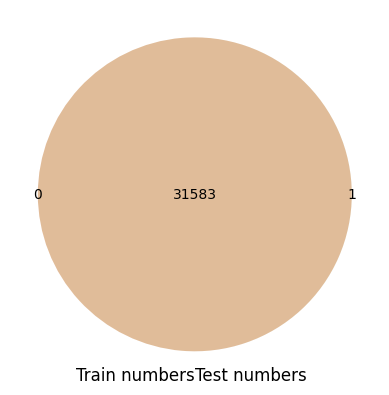

In [24]:
set_numbers_train = set(train_dataset[['ID']].drop_duplicates().sort_values(by = 'ID')['ID'].tolist())
set_numbers_test = set(test_dataset[['ID']].drop_duplicates().sort_values(by = 'ID')['ID'].tolist())
venn2((set_numbers_train, set_numbers_test), set_labels = ('Train numbers', 'Test numbers'))

In [25]:
num_var = [feature for feature in train_dataset.columns if train_dataset[feature].dtypes != 'O']
discrete_var = [feature for feature in num_var if len(train_dataset[feature].unique()) <= 25]
cont_var = [feature for feature in num_var if feature not in discrete_var]
categ_var = [feature for feature in train_dataset.columns if feature not in num_var]

In [26]:
print("The Numerical Variables are :", num_var)
print("The Discreate Variables are :", discrete_var)
print("The Continuous Variables are :", cont_var)
print("The Categorical Variables are :", categ_var)

The Numerical Variables are : ['ID', 'LTE/5g Category', 'Time', 'Packet Loss Rate', 'Packet delay', 'IoT', 'LTE/5G', 'GBR', 'Non-GBR', 'AR/VR/Gaming', 'Healthcare', 'Industry 4.0', 'IoT Devices', 'Public Safety', 'Smart City & Home', 'Smart Transportation', 'Smartphone', 'slice Type']
The Discreate Variables are : ['LTE/5g Category', 'Time', 'Packet Loss Rate', 'Packet delay', 'IoT', 'LTE/5G', 'GBR', 'Non-GBR', 'AR/VR/Gaming', 'Healthcare', 'Industry 4.0', 'IoT Devices', 'Public Safety', 'Smart City & Home', 'Smart Transportation', 'Smartphone', 'slice Type']
The Continuous Variables are : ['ID']
The Categorical Variables are : []


In [27]:
##! pip install klib

In [28]:
import klib

In [29]:
train_dataset = klib.clean_column_names(train_dataset)
test_dataset = klib.clean_column_names(test_dataset)

In [30]:
train_dataset = klib.convert_datatypes(train_dataset)
test_dataset = klib.convert_datatypes(test_dataset)

In [31]:
train_dataset.columns

Index(['id', 'lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type'],
      dtype='object')

<AxesSubplot: title={'center': 'Feature-correlation (pearson)'}>

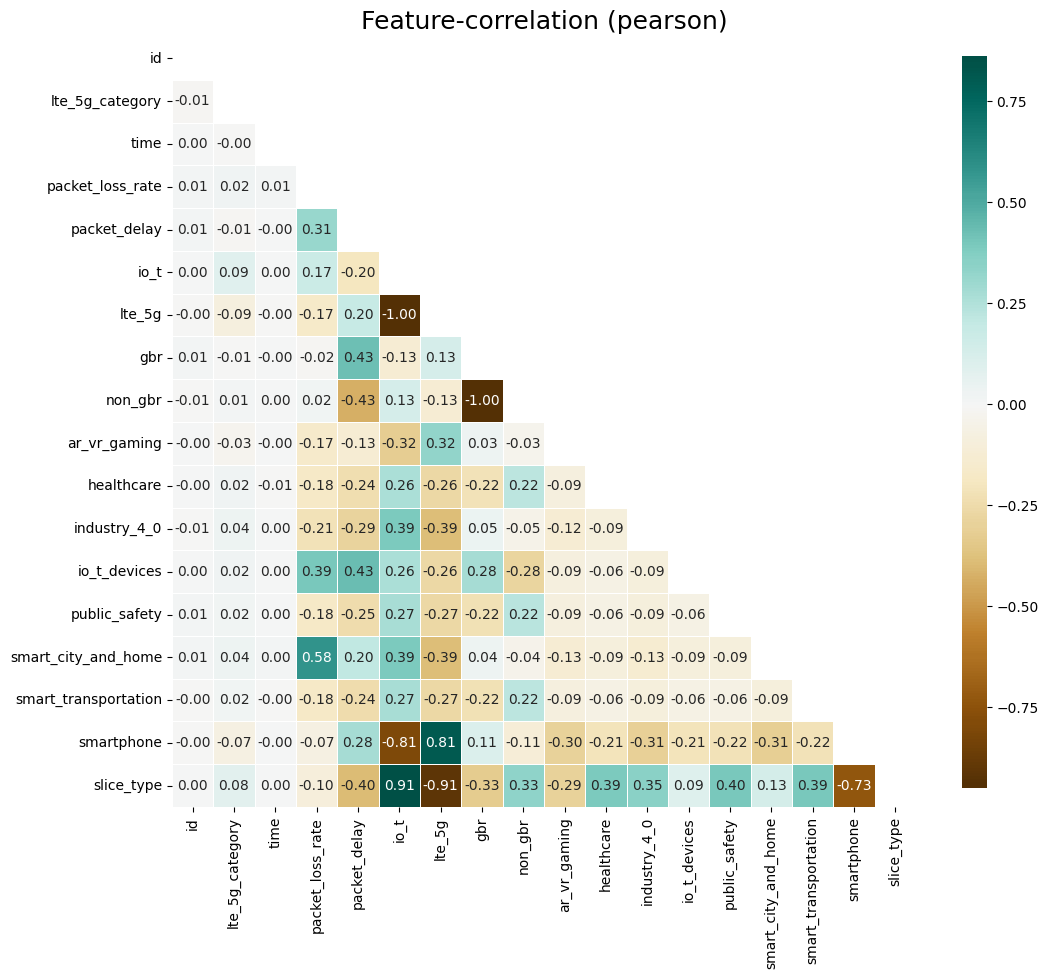

In [32]:
klib.corr_plot(train_dataset)

<AxesSubplot: title={'center': 'Feature-correlation (pearson)'}>

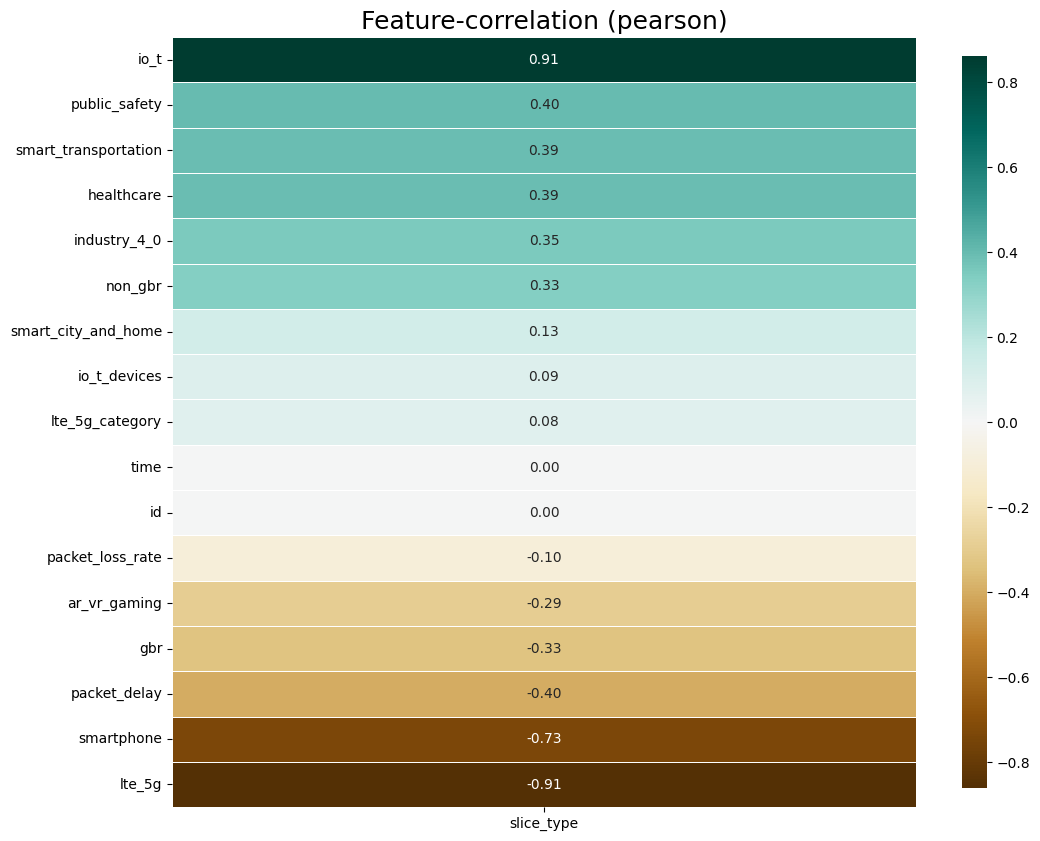

In [33]:
klib.corr_plot(train_dataset, target='slice_type')

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot: xlabel='id', ylabel='Density'>

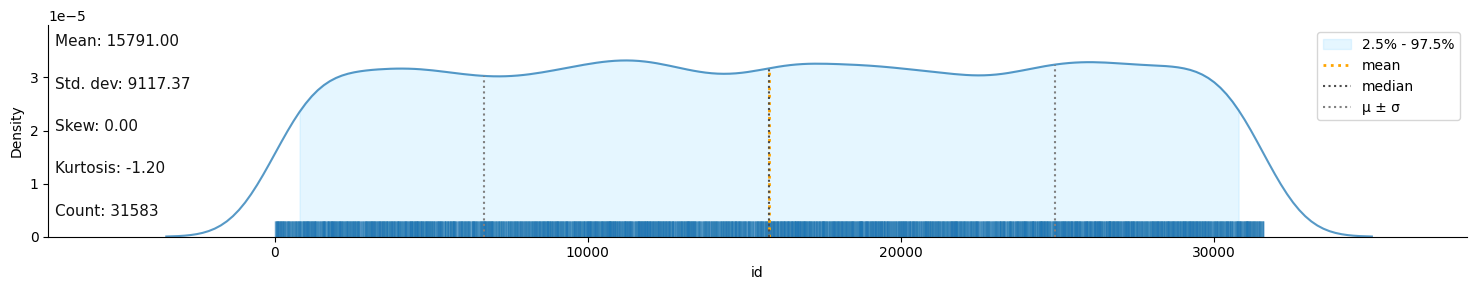

In [34]:
klib.dist_plot(train_dataset)

In [35]:
klib.missingval_plot(train_dataset)

No missing values found in the dataset.


In [36]:
klib.corr_mat(train_dataset)

,id,lte_5g_category,time,packet_loss_rate,packet_delay,io_t,lte_5g,gbr,non_gbr,ar_vr_gaming,healthcare,industry_4_0,io_t_devices,public_safety,smart_city_and_home,smart_transportation,smartphone,slice_type
id,1.00,-0.01,0.00,0.01,0.01,0.00,-0.00,0.01,-0.01,-0.00,-0.00,-0.01,0.00,0.01,0.01,-0.00,-0.00,0.00
lte_5g_category,-0.01,1.00,-0.00,0.02,-0.01,0.09,-0.09,-0.01,0.01,-0.03,0.02,0.04,0.02,0.02,0.04,0.02,-0.07,0.08
time,0.00,-0.00,1.00,0.01,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.01,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00
packet_loss_rate,0.01,0.02,0.01,1.00,0.31,0.17,-0.17,-0.02,0.02,-0.17,-0.18,-0.21,0.39,-0.18,0.58,-0.18,-0.07,-0.10
packet_delay,0.01,-0.01,-0.00,0.31,1.00,-0.20,0.20,0.43,-0.43,-0.13,-0.24,-0.29,0.43,-0.25,0.20,-0.24,0.28,-0.40
io_t,0.00,0.09,0.00,0.17,-0.20,1.00,-1.00,-0.13,0.13,-0.32,0.26,0.39,0.26,0.27,0.39,0.27,-0.81,0.91
lte_5g,-0.00,-0.09,-0.00,-0.17,0.20,-1.00,1.00,0.13,-0.13,0.32,-0.26,-0.39,-0.26,-0.27,-0.39,-0.27,0.81,-0.91
gbr,0.01,-0.01,-0.00,-0.02,0.43,-0.13,0.13,1.00,-1.00,0.03,-0.22,0.05,0.28,-0.22,0.04,-0.22,0.11,-0.33
non_gbr,-0.01,0.01,0.00,0.02,-0.43,0.13,-0.13,-1.00,1.00,-0.03,0.22,-0.05,-0.28,0.22,-0.04,0.22,-0.11,0.33
ar_vr_gaming,-0.00,-0.03,-0.00,-0.17,-0.13,-0.32,0.32,0.03,-0.03,1.00,-0.09,-0.12,-0.09,-0.09,-0.13,-0.09,-0.30,-0.29


### Eval ML

In [37]:
###!pip install evalml

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
lbl= LabelEncoder()

In [40]:
x_train = train_dataset.iloc[:,:-1]
x_train.head(2)

,id,lte_5g_category,time,packet_loss_rate,packet_delay,io_t,lte_5g,gbr,non_gbr,ar_vr_gaming,healthcare,industry_4_0,io_t_devices,public_safety,smart_city_and_home,smart_transportation,smartphone
0,0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0
1,1,18,20,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0


In [41]:
y_train= train_dataset.iloc[:,-1:]
y_train= lbl.fit_transform(y_train)
y_train

array([2, 0, 0, ..., 1, 2, 2])

In [42]:
x_test = test_dataset.iloc[:,:-1]
x_test.head(2)

,id,lte_5g_category,time,packet_loss_rate,packet_delay,io_t,lte_5g,gbr,non_gbr,ar_vr_gaming,healthcare,industry_4_0,io_t_devices,public_safety,smart_city_and_home,smart_transportation,smartphone
0,0,15,17,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0
1,1,14,18,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0


In [43]:
y_test= test_dataset.iloc[:,-1:]
y_test= lbl.fit_transform(y_test)
y_test

array([0, 0, 0, ..., 0, 0, 0])

### Feature Selection

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [45]:
from sklearn.linear_model import Lasso

In [46]:
# calling the model with the best parameter
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(x_train, y_train)

# Using np.abs() to make coefficients positive.
lasso1_coef = np.abs(lasso1.coef_)


In [47]:
lasso1_coef

array([1.94401739e-08, 6.67502754e-05, 1.03158665e-04, 1.63027496e+01,
       1.31275359e-04, 1.51697826e+00, 9.61659043e-06, 1.88853890e-01,
       0.00000000e+00, 2.41860263e-02, 3.41094315e-01, 5.61733730e-02,
       2.68648416e-01, 3.41094851e-01, 3.80820930e-01, 3.41106206e-01,
       1.59913655e-02], dtype=float32)

In [48]:
####! pip install evalml

In [49]:
import evalml

In [50]:
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>,
 <ProblemTypes.MULTISERIES_TIME_SERIES_REGRESSION: 'multiseries time series regression'>]

In [51]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=x_train, y_train=y_train, problem_type='MULTICLASS')
automl.search()

{1: {'Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model': 7.876364469528198,
  'Total time of batch': 8.039944648742676},
 2: {'LightGBM Classifier w/ Label Encoder + Imputer + Select Columns Transformer': 2.230330467224121,
  'Extra Trees Classifier w/ Label Encoder + Imputer + Select Columns Transformer': 2.5660414695739746,
  'Elastic Net Classifier w/ Label Encoder + Imputer + Standard Scaler + Select Columns Transformer': 6.2131359577178955,
  'XGBoost Classifier w/ Label Encoder + Imputer + Select Columns Transformer': 2.503875970840454,
  'Logistic Regression Classifier w/ Label Encoder + Imputer + Standard Scaler + Select Columns Transformer': 5.882632493972778,
  'Total time of batch': 20.128440380096436}}

In [52]:

automl.rankings


,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,1,Random Forest Classifier w/ Label Encoder + Im...,1,4.440892e-16,4.440892e-16,0.000000e+00,100.000000,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,3,Extra Trees Classifier w/ Label Encoder + Impu...,3,4.440892e-16,4.440892e-16,0.000000e+00,100.000000,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,2,LightGBM Classifier w/ Label Encoder + Imputer...,2,1.142611e-06,1.142611e-06,6.540846e-12,99.999993,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,5,XGBoost Classifier w/ Label Encoder + Imputer ...,5,9.683620e-05,9.683620e-05,2.555998e-07,99.999426,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,4,Elastic Net Classifier w/ Label Encoder + Impu...,4,2.136304e-04,2.136304e-04,3.693347e-06,99.998734,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,6,Logistic Regression Classifier w/ Label Encode...,6,2.224173e-04,2.224173e-04,3.938498e-06,99.998682,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,0,Mode Baseline Multiclass Classification Pipeline,0,1.687203e+01,1.687203e+01,9.253124e-04,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [53]:
automl.best_pipeline

pipeline = MulticlassClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Imputer': ['Imputer', 'X', 'Label Encoder.y'], 'RF Classifier Select From Model': ['RF Classifier Select From Model', 'Imputer.x', 'Label Encoder.y'], 'Random Forest Classifier': ['Random Forest Classifier', 'RF Classifier Select From Model.x', 'Label Encoder.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'boolean_impute_strategy': 'most_frequent', 'categorical_fill_value': None, 'numeric_fill_value': None, 'boolean_fill_value': None}, 'RF Classifier Select From Model':{'number_features': None, 'n_estimators': 10, 'max_depth': None, 'percent_features': 0.5, 'threshold': 'median', 'n_jobs': -1}, 'Random Forest Classifier':{'n_estimators': 100, 'max_depth': 6, 'n_jobs': -1}}, random_seed=0)

In [54]:
best_pipeline=automl.best_pipeline

In [55]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


*****************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:
*****************************************************************************************


* Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model *


INFO:evalml.pipelines.pipeline_base.describe:* Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model *


*****************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:*****************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:


Problem Type: multiclass


INFO:evalml.pipelines.pipeline_base.describe:Problem Type: multiclass


Model Family: Random Forest


INFO:evalml.pipelines.pipeline_base.describe:Model Family: Random Forest


INFO:evalml.pipelines.pipeline_base.describe:


Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:==============


1. Label Encoder


INFO:evalml.pipelines.component_graph.describe:1. Label Encoder


	 * positive_label : None


INFO:evalml.pipelines.components.component_base.describe:	 * positive_label : None


2. Imputer


INFO:evalml.pipelines.component_graph.describe:2. Imputer


	 * categorical_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_impute_strategy : mean


	 * boolean_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_impute_strategy : most_frequent


	 * categorical_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_fill_value : None


	 * numeric_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_fill_value : None


	 * boolean_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_fill_value : None


3. RF Classifier Select From Model


INFO:evalml.pipelines.component_graph.describe:3. RF Classifier Select From Model


	 * number_features : None


INFO:evalml.pipelines.components.component_base.describe:	 * number_features : None


	 * n_estimators : 10


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 10


	 * max_depth : None


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : None


	 * percent_features : 0.5


INFO:evalml.pipelines.components.component_base.describe:	 * percent_features : 0.5


	 * threshold : median


INFO:evalml.pipelines.components.component_base.describe:	 * threshold : median


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


4. Random Forest Classifier


INFO:evalml.pipelines.component_graph.describe:4. Random Forest Classifier


	 * n_estimators : 100


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 100


	 * max_depth : 6


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : 6


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


INFO:evalml.automl.automl_search.describe_pipeline:


Training


INFO:evalml.automl.automl_search.describe_pipeline:Training


INFO:evalml.automl.automl_search.describe_pipeline:========


Training for multiclass problems.


INFO:evalml.automl.automl_search.describe_pipeline:Training for multiclass problems.


Total training time (including CV): 7.8 seconds


INFO:evalml.automl.automl_search.describe_pipeline:Total training time (including CV): 7.8 seconds


INFO:evalml.automl.automl_search.describe_pipeline:


Cross Validation


INFO:evalml.automl.automl_search.describe_pipeline:Cross Validation


----------------


INFO:evalml.automl.automl_search.describe_pipeline:----------------


             Log Loss Multiclass  MCC Multiclass  AUC Weighted  AUC Macro  AUC Micro  Precision Weighted  Precision Macro  Precision Micro  F1 Weighted  F1 Macro  F1 Micro  Balanced Accuracy Multiclass  Accuracy Multiclass # Training # Validation
0                          0.000           1.000         1.000      1.000      1.000               1.000            1.000            1.000        1.000     1.000     1.000                         1.000                1.000     21,055       10,528
1                          0.000           1.000         1.000      1.000      1.000               1.000            1.000            1.000        1.000     1.000     1.000                         1.000                1.000     21,055       10,528
2                          0.000           1.000         1.000      1.000      1.000               1.000            1.000            1.000        1.000     1.000     1.000                         1.000                1.000     21,056       10,527
mean        

INFO:evalml.automl.automl_search.describe_pipeline:             Log Loss Multiclass  MCC Multiclass  AUC Weighted  AUC Macro  AUC Micro  Precision Weighted  Precision Macro  Precision Micro  F1 Weighted  F1 Macro  F1 Micro  Balanced Accuracy Multiclass  Accuracy Multiclass # Training # Validation
0                          0.000           1.000         1.000      1.000      1.000               1.000            1.000            1.000        1.000     1.000     1.000                         1.000                1.000     21,055       10,528
1                          0.000           1.000         1.000      1.000      1.000               1.000            1.000            1.000        1.000     1.000     1.000                         1.000                1.000     21,055       10,528
2                          0.000           1.000         1.000      1.000      1.000               1.000            1.000            1.000        1.000     1.000     1.000                         1.000       

In [56]:
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>,
 <ProblemTypes.MULTISERIES_TIME_SERIES_REGRESSION: 'multiseries time series regression'>]

In [57]:
from evalml.objectives import get_optimization_objectives

In [58]:
from evalml.problem_types import ProblemTypes

for objective in get_optimization_objectives(ProblemTypes.MULTICLASS):
    print(objective.name)

MCC Multiclass
Log Loss Multiclass
AUC Weighted
AUC Macro
AUC Micro
Precision Weighted
Precision Macro
Precision Micro
F1 Weighted
F1 Macro
F1 Micro
Balanced Accuracy Multiclass
Accuracy Multiclass


In [59]:
automl_auc = AutoMLSearch(X_train=x_train, y_train=y_train,
                          problem_type='multiclass',
                          objective='F1 Weighted',
                          additional_objectives=['Balanced Accuracy Multiclass', 'Accuracy Multiclass'],
                          max_batches=1,
                          optimize_thresholds=True)

automl_auc.search()

{1: {'Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model': 2.7275333404541016,
  'Total time of batch': 2.857375383377075}}

In [60]:
automl_auc.rankings

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,1,Random Forest Classifier w/ Label Encoder + Im...,1,1.000000,1.000000,0.000000,63.063167,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,0,Mode Baseline Multiclass Classification Pipeline,0,0.369368,0.369368,0.000029,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [61]:
automl_auc.describe_pipeline(automl_auc.rankings.iloc[0]["id"])


*****************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:
*****************************************************************************************


* Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model *


INFO:evalml.pipelines.pipeline_base.describe:* Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model *


*****************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:*****************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:


Problem Type: multiclass


INFO:evalml.pipelines.pipeline_base.describe:Problem Type: multiclass


Model Family: Random Forest


INFO:evalml.pipelines.pipeline_base.describe:Model Family: Random Forest


INFO:evalml.pipelines.pipeline_base.describe:


Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:==============


1. Label Encoder


INFO:evalml.pipelines.component_graph.describe:1. Label Encoder


	 * positive_label : None


INFO:evalml.pipelines.components.component_base.describe:	 * positive_label : None


2. Imputer


INFO:evalml.pipelines.component_graph.describe:2. Imputer


	 * categorical_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_impute_strategy : mean


	 * boolean_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_impute_strategy : most_frequent


	 * categorical_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_fill_value : None


	 * numeric_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_fill_value : None


	 * boolean_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_fill_value : None


3. RF Classifier Select From Model


INFO:evalml.pipelines.component_graph.describe:3. RF Classifier Select From Model


	 * number_features : None


INFO:evalml.pipelines.components.component_base.describe:	 * number_features : None


	 * n_estimators : 10


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 10


	 * max_depth : None


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : None


	 * percent_features : 0.5


INFO:evalml.pipelines.components.component_base.describe:	 * percent_features : 0.5


	 * threshold : median


INFO:evalml.pipelines.components.component_base.describe:	 * threshold : median


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


4. Random Forest Classifier


INFO:evalml.pipelines.component_graph.describe:4. Random Forest Classifier


	 * n_estimators : 100


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 100


	 * max_depth : 6


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : 6


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


INFO:evalml.automl.automl_search.describe_pipeline:


Training


INFO:evalml.automl.automl_search.describe_pipeline:Training


INFO:evalml.automl.automl_search.describe_pipeline:========


Training for multiclass problems.


INFO:evalml.automl.automl_search.describe_pipeline:Training for multiclass problems.


Total training time (including CV): 2.7 seconds


INFO:evalml.automl.automl_search.describe_pipeline:Total training time (including CV): 2.7 seconds


INFO:evalml.automl.automl_search.describe_pipeline:


Cross Validation


INFO:evalml.automl.automl_search.describe_pipeline:Cross Validation


----------------


INFO:evalml.automl.automl_search.describe_pipeline:----------------


             F1 Weighted  Balanced Accuracy Multiclass  Accuracy Multiclass # Training # Validation
0                  1.000                         1.000                1.000     21,055       10,528
1                  1.000                         1.000                1.000     21,055       10,528
2                  1.000                         1.000                1.000     21,056       10,527
mean               1.000                         1.000                1.000          -            -
std                0.000                         0.000                0.000          -            -
coef of var        0.000                         0.000                0.000          -            -


INFO:evalml.automl.automl_search.describe_pipeline:             F1 Weighted  Balanced Accuracy Multiclass  Accuracy Multiclass # Training # Validation
0                  1.000                         1.000                1.000     21,055       10,528
1                  1.000                         1.000                1.000     21,055       10,528
2                  1.000                         1.000                1.000     21,056       10,527
mean               1.000                         1.000                1.000          -            -
std                0.000                         0.000                0.000          -            -
coef of var        0.000                         0.000                0.000          -            -


In [62]:
best_pipeline_auc = automl_auc.best_pipeline


In [63]:

# get the score on holdout data
best_pipeline_auc.score(x_test, y_test,  objectives=["F1 Weighted"])

OrderedDict([('F1 Weighted', 0.6944444444444444)])

In [64]:
best_pipeline.save("ml_challenges_pipelines.pkl")

In [65]:
final_model=automl.load('ml_challenges_pipelines.pkl')

In [66]:
y_pred = final_model.predict(x_test)

In [67]:
y_pred = pd.DataFrame(y_pred)

In [68]:
y_pred.value_counts()

0    16800
1     7392
2     7392
dtype: int64

### AutoML

In [69]:
###! pip install pycaret

In [70]:
###! pip install jinja2

In [71]:
###! pip install markupsafe==2.0.1

In [72]:
import pycaret

In [73]:
from pycaret.classification import *

In [74]:
train_dataset.columns

Index(['id', 'lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type'],
      dtype='object')

In [77]:
from pycaret.classification import *
setup = setup(data=train_dataset, target='slice_type', session_id=123)

,Description,Value
0,Session id,123
1,Target,slice_type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(31583, 18)"
5,Transformed data shape,"(31583, 18)"
6,Transformed train set shape,"(22108, 18)"
7,Transformed test set shape,"(9475, 18)"
8,Numeric features,17
9,Preprocess,True


In [78]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,4.6110
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0670
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0670
ridge,Ridge Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0680
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8180
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8000
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,6.3020
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6720
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.1610
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.6010


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
naivebayes= create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [82]:
naivebayes = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

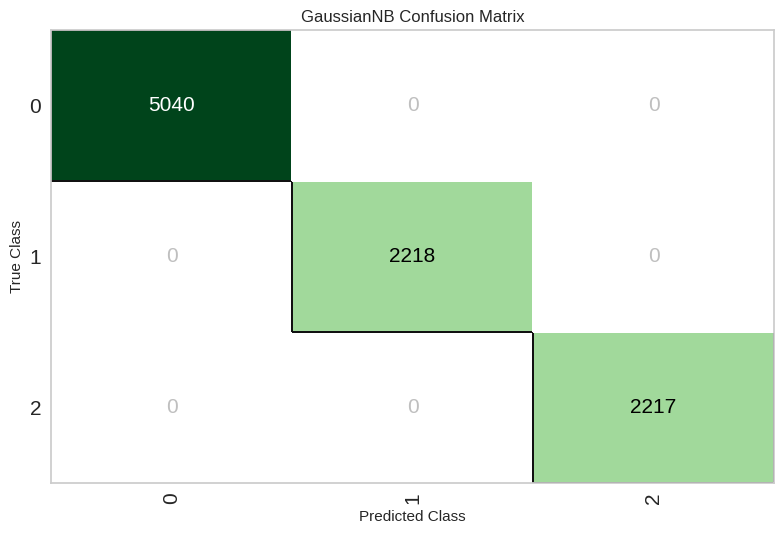

In [83]:
plot_model(naivebayes, "confusion_matrix")

In [84]:
tune_naivebayes = tune_model(naivebayes)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [85]:
print(tune_naivebayes)

GaussianNB(priors=None, var_smoothing=1e-09)


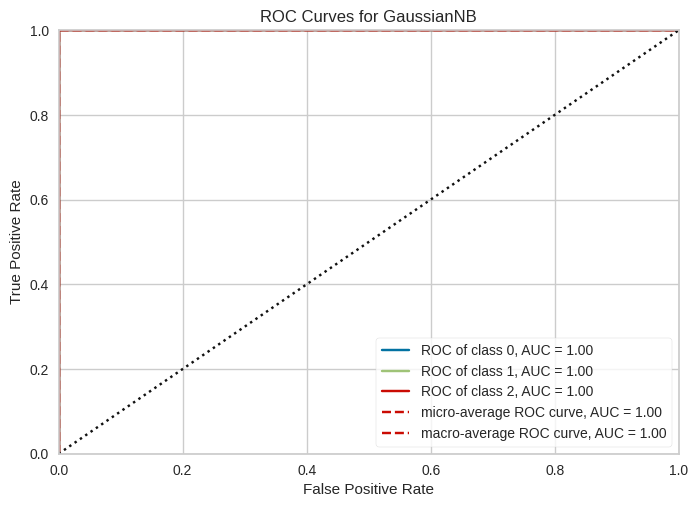

In [86]:
plot_model(tune_naivebayes)

In [88]:
#predict_model(tune_naivebayes)
final_tune_naivebayes = finalize_model(tune_naivebayes)
print(final_tune_naivebayes)

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['id', 'lte_5g_category', 'time',
                                             'packet_loss_rate', 'packet_delay',
                                             'io_t', 'lte_5g', 'gbr', 'non_gbr',
                                             'ar_vr_gaming', 'healthcare',
                                             'industry_4_0', '...
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    t

In [90]:
y_pred = final_tune_naivebayes.predict(x_test)

In [94]:
y_pred = pd.DataFrame(y_pred)

In [96]:
y_pred.shape

(31584, 1)

In [97]:
test_dataset.shape

(31584, 18)

In [99]:
save_model(final_tune_naivebayes,'Final_RF_Model_08Feb2020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['id', 'lte_5g_category', 'time',
                                              'packet_loss_rate', 'packet_delay',
                                              'io_t', 'lte_5g', 'gbr', 'non_gbr',
                                              'ar_vr_gaming', 'healthcare',
                                              'industry_4_0', '...
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                      

In [100]:
from sklearn.metrics import classification_report
from sklearn.metrics import class_likelihood_ratios

In [102]:
y_pred.value_counts()

slice_type
1             16800
2              7392
3              7392
dtype: int64